# **Washoe County 2017 Sales Report Analysis**

This is analysis, we will look into the [Washoe County Sales Report Data](https://www.washoecounty.us/assessor/online_data/sales_reports.php). This is a dataset that includes data on sales made in Washoe County during the 2017 fiscal year. We will clean this data up and use it to get an insight into the housing market in Washoe County. We can also apply regression to this dataset and predict housing prices based on different features included in the Sales Report.

![](https://cdnparap100.paragonrels.com/ParagonImages/Property/P10/NNRMLS/170012273/0/0/0/662321a8ae87b96b5ef6e001d90e839e/15/2301c3cce54ff5e8c05025ff3c970831/170012273.JPG)

## **Import Libraries**

We start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## **Read in data**

We now read in our data from the Washoe County website given in xls format. 
* [Washoe Sales Report Link](https://www.washoecounty.us/assessor/online_data/sales_reports.php)

In [2]:
sales = pd.read_excel('RDEQISales2017.xls',sheet_name='Sheet1',header=1,na_values=np.nan)

Let's look at what was read in.

In [3]:
sales.head()

,APN,Add Rec,Situs,Sales Date,Sale Price,Sale Verf,RecDoc,Subdivision,Year Blt,Avg Yr Blt,...,Mailing2,City,State,Zip,PriorOwner,PriorPID,LegalDesc,TaxDist,Total Units,Neighborhood
0,001-020-03,NaN,3947 KINGS ROW,01/10/2017,175000,2D,4669528,WINDERMERE 1,1984,1984,...,NaN,RENO,NV,89503,"WRIGHT, FAEZEH F",- -,WINDERMERE 1 LT 3 BLK A,1000,1,BACA
1,001-020-11,NaN,3963 KINGS ROW,07/28/2017,259000,2D,4728450,WINDERMERE 1,1984,1984,...,NaN,LAFAYETTE,CA,94549,"TAEUBEL, ANTHONY M & KIMBERLY A",- -,WINDERMERE 1 LT 11 BLK A,1000,1,BACA
2,001-020-15,NaN,3971 KINGS ROW,11/30/2017,200000,2D,4767999,WINDERMERE 1,1984,1984,...,NaN,RENO,NV,89503,"MURPHY, MICHAEL M",- -,WINDERMERE 1 LT 15 BLK A,1000,1,BACA
3,001-030-02,NaN,2850 COLUMBUS WAY,04/20/2017,280000,2D,4697273,WINDMERE ESTATES,1984,1984,...,NaN,RENO,NV,89503,"ALBARRAN, ROSA I",- -,WINDERMERE EST LT 1 BLK A,1000,1,BAGC
4,001-041-51,NaN,2730 GULLING CT,08/31/2017,308800,2D,4739571,GULLING,2007,2007,...,NaN,SAN RAMON,CA,94582,"FRY, HARRY C",001-041-46,GULLING LT 5,1000,1,BCBC


Now, let's extract some basic information from our dataset.

In [4]:
sales.describe()

,Sale Price,Year Blt,Avg Yr Blt,Bldg SF,Beds,Full Baths,Half Baths,Gar Area,Bsmt Area,Acres,TaxDist,Total Units
count,1.350000e+04,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000
mean,1.743231e+06,1777.288741,1778.077704,2271.792444,2.781111,1.903111,0.285704,373.956815,82.285778,1.718017,2116.871778,1.341407
std,6.131999e+06,617.587266,617.832898,11903.451195,2.052539,1.728974,0.467559,307.538183,458.214167,16.371669,1511.198018,9.616290
min,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000987,1000.000000,0.000000
25%,2.500000e+05,1971.000000,1972.000000,1160.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.116001,1000.000000,1.000000
50%,3.420000e+05,1993.000000,1994.000000,1624.000000,3.000000,2.000000,0.000000,440.000000,0.000000,0.169571,1011.000000,1.000000
75%,5.050000e+05,2005.000000,2005.000000,2215.000000,4.000000,2.000000,1.000000,576.000000,0.000000,0.322205,4000.000000,1.000000
max,1.560000e+08,2018.000000,2018.000000,676431.000000,108.000000,113.000000,5.000000,4258.000000,18280.000000,871.000000,9601.000000,568.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 40 columns):
APN               13500 non-null object
Add Rec           185 non-null object
Situs             13465 non-null object
Sales Date        13500 non-null object
Sale Price        13500 non-null int64
Sale Verf         13500 non-null object
RecDoc            13500 non-null object
Subdivision       13457 non-null object
Year Blt          13500 non-null int64
Avg Yr Blt        13500 non-null int64
BldgType          12047 non-null object
Stories           11653 non-null object
Bldg SF           13500 non-null int64
Grade             12047 non-null object
Beds              13500 non-null int64
Full Baths        13500 non-null int64
Half Baths        13500 non-null int64
Heat Type         12047 non-null object
Exterior Walls    12047 non-null object
Roof Type         11523 non-null object
Gar Type          9193 non-null object
Gar Area          13500 non-null int64
Bsmt Type         960 

## **Let's get a better understanding of our data!**

Here I am just exploring the dataset a bit, I was interested in the APN column and wanted to know more about it.

In [6]:
sales[sales['APN'] == sales['APN'].value_counts().index[0]]

,APN,Add Rec,Situs,Sales Date,Sale Price,Sale Verf,RecDoc,Subdivision,Year Blt,Avg Yr Blt,...,Mailing2,City,State,Zip,PriorOwner,PriorPID,LegalDesc,TaxDist,Total Units,Neighborhood
9053,165-192-03,NaN,1870 CASCADE STABLE DR,09/22/2017,453000,2D,4747120,BELLA VISTA RANCH VLG B-2,2017,2017,...,NaN,RENO,NV,89521,"LOPIANO LIVING TRUST, DAVID",165-131-03,BELLA VISTA RANCH VLG B-2 LOT 95,1000,1,EDKC
9054,165-192-03,NaN,1870 CASCADE STABLE DR,11/03/2017,467602,2D,4760724,BELLA VISTA RANCH VLG B-2,2017,2017,...,NaN,RENO,NV,89521,D R HORTON CA2 INC,165-131-03,BELLA VISTA RANCH VLG B-2 LOT 95,1000,1,EDKC
9055,165-192-03,NaN,1870 CASCADE STABLE DR,09/15/2017,453000,2D,4744519,BELLA VISTA RANCH VLG B-2,2017,2017,...,NaN,RENO,NV,89521,D R HORTON CA2 INC,165-131-03,BELLA VISTA RANCH VLG B-2 LOT 95,1000,1,EDKC


As we can see it seems to be a type of building code that represents certain buildings in Washoe County.

Since we are interested in analyzing sales of homes, we must only consider data that has a building type and address entries.

We should look at the different type of buildings to see the variations.

In [7]:
build_type = sales['BldgType'].value_counts().index
sales['BldgType'].count()

12047

We have started with 13,500 data entries and only have building types for 12,047 of them.

In [8]:
build_type

Index(['Sgl Fam Res ', 'Townhse End', 'Townhse Ins', 'MH Real Prop',
       'Multiple Res (Low Rise)', 'Office Building', 'Duplex', 'Retail Store',
       'Conversion', 'HiRise Condo', 'Parking Level', 'Storage Warehouse',
       'Industrial Flex Building', 'Restaurant', 'Motel', 'Hotel Condo',
       'Discount Store', 'Service Repair Garage', 'Hotel, Limited Service',
       'Neighborhood Shopping Ctr', 'Fast Food Restaurant', 'Mini-Warehouse',
       'Industrials, Light Mftg.', 'Medical Office', 'Hotel, Full Service',
       'Convenience Market', 'Mega Warehouse', 'Casino', 'Bar/Tavern',
       'Equipment (Shop) Building', 'Dental Office/Clinic',
       'Regional Shopping Center', 'Bank', 'Shell, Office',
       'Mixed Retail w/ Resid. Units', 'Community Shopping Center',
       'Apartment', 'Lt. Commercial Utility Build.', 'Day Care Center',
       'Church', 'Barber Shop', 'Mini-Lube Garage', 'Bowling Center',
       'Storage Garage', 'Market', 'Automotive Center',
       'Multiple 

In [9]:
print('Data Entries: {}, Percent of data without a street address or type of building or stories entries entries: {:.2f}%'.format(
    len(sales[(sales['BldgType'].isna()) | (sales['Situs'].isna()) | (sales['Stories'].isna())]),
    len(sales[(sales['BldgType'].isna()) | (sales['Situs'].isna() | (sales['Stories'].isna()))])
    /len(sales)*100))

messy = sales[(sales['BldgType'].notna()) & (sales['Situs'].notna()) & (sales['Stories'].notna())].copy()

Data Entries: 1882, Percent of data without a street address or type of building or stories entries entries: 13.94%


Here we can see that we essentially have lost 14% of the data from the original sales report as they do not have a address, building type, or stories entries.

Let's now dig deeper into the data. Let's check out our dataframe once again!

In [10]:
messy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11618 entries, 0 to 13498
Data columns (total 40 columns):
APN               11618 non-null object
Add Rec           185 non-null object
Situs             11618 non-null object
Sales Date        11618 non-null object
Sale Price        11618 non-null int64
Sale Verf         11618 non-null object
RecDoc            11618 non-null object
Subdivision       11576 non-null object
Year Blt          11618 non-null int64
Avg Yr Blt        11618 non-null int64
BldgType          11618 non-null object
Stories           11618 non-null object
Bldg SF           11618 non-null int64
Grade             11618 non-null object
Beds              11618 non-null int64
Full Baths        11618 non-null int64
Half Baths        11618 non-null int64
Heat Type         11618 non-null object
Exterior Walls    11618 non-null object
Roof Type         11095 non-null object
Gar Type          9145 non-null object
Gar Area          11618 non-null int64
Bsmt Type         958 

We now have 11,618 entries from 13,500 original entries. Let's look at the value count of the 'BldgType' column.

In [11]:
messy['BldgType'].value_counts()

Sgl Fam Res                      9088
Townhse End                      1249
Townhse Ins                       645
Multiple Res (Low Rise)           110
Office Building                    78
Duplex                             69
Retail Store                       46
Conversion                         44
HiRise Condo                       40
Parking Level                      32
Storage Warehouse                  31
Industrial Flex Building           26
Restaurant                         22
Motel                              11
Hotel Condo                         8
Discount Store                      8
Service Repair Garage               7
Hotel, Limited Service              6
Fast Food Restaurant                5
Mini-Warehouse                      5
Neighborhood Shopping Ctr           5
Industrials, Light Mftg.            4
Medical Office                      4
Hotel, Full Service                 4
Convenience Market                  4
Mega Warehouse                      4
Casino      

As we  see there are 63 different values in the column. This is way too many and we can shrink this down a little and aggregate some entries together, so let's do that.

## **Cleaning our Data**

Let's build a dictionary of replacement values.

In [12]:
building_type_dict = {'Sgl Fam Res ':'Residential House', 'Townhse End':'End Townhouse','Mixed Retail w/ Resid. Units':'Store',
                      'Townhse Ins':'Middle Townhouse', 'Multiple Res (Low Rise)':'Low Rise Apartment',
                      'HiRise Condo':'High Rise Condo', 'Parking Level':'Parking',
                      'Industrial Flex Building':'Industrial Building', 'Retail Store':'Store',
                     'Discount Store':'Store', 'Service Repair Garage':'Repair Garage',
                      'Hotel, Limited Service':'Hotel', 'Hotel Condo':'Hotel',
                     'Neighborhood Shopping Ctr':'Shopping Center','Fast Food Restaurant':'Restaurant',
                     'Mini-Warehouse':'Warehouse','Mega Warehouse':'Warehouse',
                      'Equipment (Shop) Building':'Equipment Shop','Hotel, Full Service':'Hotel',
                     'Convenience Market':'Store','Industrials, Light Mftg.':'Industrial Building',
                     'Shell, Office':'Office Building','Regional Shopping Center':'Shopping Center',
                     'Dental Office/Clinic':'Medical Building','Mini-Lube Garage':'Repair Garage',
                     'Apartment':'Low Rise Apartment','Lt. Commercial Utility Build.':'Industrial Building',
                     'Community Shopping Center':'Shopping Center','Multiple Res. (Sen. Citizen)':'Group Care Home',
                     'Theater - Live Stage':'Entertainment Building','Automotive Center':'Car Dealership',
                     'Market':'Store','Veterinary Hospital':'Medical Building',
                     'Distribution Warehouse':'Warehouse','Clubhouse':'Country Club',
                     'Storage Garage':'Storage','Storage Warehouse':'Storage',
                     'Supermarket':'Store','Automobile Showroom':'Entertainment Building',
                     'Fire Station (Volunteer)':'Fire Station','Bowling Center':'Entertainment Building',
                     'Shell, Neigh. Shop. Ctr.':'Shopping Center','Service Garage Shed':'Repair Garage',
                     'Shed Office Structure':'Office Building','Handball-Racquetball Club':'Country Club',
                     'Discount Warehouse Store':'Store','Medical Office':'Medical Building',
                     'MH Real Prop':'MH Real Prop','Office Building':'Office Building',
                     'Duplex':'Duplex','Conversion':'Conversion','Restaurant':'Restaurant',
                     'Motel':'Motel','Bar/Tavern':'Bar','Casino':'Entertainment Building','Bank':'Bank',
                     'Church':'Church','Barber Shop':'Barber Shop','Day Care Center':'Day Care Center',
                     'Group Care Home':'Group Care Home','Country Club':'Country Club',
                     'Restroom Building':'Restroom Building','Classroom':'Classroom','Dispensary':'Dispensary'}




In [13]:
messy['BldgType'] = messy['BldgType'].map(building_type_dict)

We have now mapped the dictionary to our column, let's look at what it did!

In [14]:
messy['BldgType'].value_counts()

Residential House         9088
End Townhouse             1249
Middle Townhouse           645
Low Rise Apartment         112
Office Building             82
Duplex                      69
Store                       64
Conversion                  44
High Rise Condo             40
Industrial Building         32
Storage                     32
Parking                     32
Restaurant                  27
Hotel                       18
Shopping Center             11
Motel                       11
Warehouse                   10
Repair Garage               10
Medical Building             8
Entertainment Building       7
Equipment Shop               4
Bar                          4
Country Club                 3
Bank                         3
Group Care Home              2
Day Care Center              2
Barber Shop                  2
Church                       2
Restroom Building            1
Classroom                    1
Fire Station                 1
Car Dealership               1
Dispensa

In [15]:
messy['BldgType'].count()

11618

Perfect, we changed all the column values and ended with how many we started with!

Let's now create new columns based off previous columns. This is a bit of feature engineering that will help us better visualize our data and extract more useful information.

We will make a 'month','day' and 'street' column based off the 'Sales Date' and 'Situs' columns. We also go about dropping some columns that are not necessary to our analysis at the moment and are full of null values.

In [16]:
messy['Sale Month'] = messy['Sales Date'].apply(lambda x: int(x.split('/')[0]))
messy['Sale Day'] = messy['Sales Date'].apply(lambda x: int(x.split('/')[1]))
messy['Street'] = messy['Situs'].apply(lambda x: ' '.join(x.split()[1:]))

#While we are at it let's also drop the columns Add Rec, Bsmt Type, Mailing2
cleaned = messy.drop(['Situs','Sales Date' ,'Add Rec', 'Bsmt Type', 'Mailing2'],axis=1).copy()

cleaned.head()

,APN,Sale Price,Sale Verf,RecDoc,Subdivision,Year Blt,Avg Yr Blt,BldgType,Stories,Bldg SF,...,Zip,PriorOwner,PriorPID,LegalDesc,TaxDist,Total Units,Neighborhood,Sale Month,Sale Day,Street
0,001-020-03,175000,2D,4669528,WINDERMERE 1,1984,1984,Middle Townhouse,TWO STORY,1518,...,89503,"WRIGHT, FAEZEH F",- -,WINDERMERE 1 LT 3 BLK A,1000,1,BACA,1,10,KINGS ROW
1,001-020-11,259000,2D,4728450,WINDERMERE 1,1984,1984,Middle Townhouse,TWO STORY,1638,...,94549,"TAEUBEL, ANTHONY M & KIMBERLY A",- -,WINDERMERE 1 LT 11 BLK A,1000,1,BACA,7,28,KINGS ROW
2,001-020-15,200000,2D,4767999,WINDERMERE 1,1984,1984,End Townhouse,TWO STORY,1123,...,89503,"MURPHY, MICHAEL M",- -,WINDERMERE 1 LT 15 BLK A,1000,1,BACA,11,30,KINGS ROW
3,001-030-02,280000,2D,4697273,WINDMERE ESTATES,1984,1984,Residential House,SINGLE STORY,1334,...,89503,"ALBARRAN, ROSA I",- -,WINDERMERE EST LT 1 BLK A,1000,1,BAGC,4,20,COLUMBUS WAY
4,001-041-51,308800,2D,4739571,GULLING,2007,2007,Residential House,TWO STORY,1704,...,94582,"FRY, HARRY C",001-041-46,GULLING LT 5,1000,1,BCBC,8,31,GULLING CT


In [17]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11618 entries, 0 to 13498
Data columns (total 38 columns):
APN               11618 non-null object
Sale Price        11618 non-null int64
Sale Verf         11618 non-null object
RecDoc            11618 non-null object
Subdivision       11576 non-null object
Year Blt          11618 non-null int64
Avg Yr Blt        11618 non-null int64
BldgType          11618 non-null object
Stories           11618 non-null object
Bldg SF           11618 non-null int64
Grade             11618 non-null object
Beds              11618 non-null int64
Full Baths        11618 non-null int64
Half Baths        11618 non-null int64
Heat Type         11618 non-null object
Exterior Walls    11618 non-null object
Roof Type         11095 non-null object
Gar Type          9145 non-null object
Gar Area          11618 non-null int64
Bsmt Area         11618 non-null int64
LUC at Sale       11618 non-null object
Zoning            11618 non-null object
Acres             116

In [18]:
cleaned.describe()

,Sale Price,Year Blt,Avg Yr Blt,Bldg SF,Beds,Full Baths,Half Baths,Gar Area,Bsmt Area,Acres,TaxDist,Total Units,Sale Month,Sale Day
count,1.161800e+04,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000
mean,1.419880e+06,1991.570838,1992.483732,2580.946032,3.119814,2.137115,0.330608,432.025564,94.832243,0.708035,1956.404459,1.521777,6.795404,17.565760
std,5.548108e+06,21.559018,20.600976,12800.342491,1.949328,1.721172,0.488054,289.891883,488.307066,11.626608,1335.158962,10.353363,3.217606,8.937303
min,1.400000e+04,1875.000000,1875.000000,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000987,1000.000000,0.000000,1.000000,1.000000
25%,2.630000e+05,1978.000000,1979.000000,1302.250000,3.000000,2.000000,0.000000,294.000000,0.000000,0.109045,1000.000000,1.000000,4.000000,10.000000
50%,3.430000e+05,1998.000000,1998.000000,1734.000000,3.000000,2.000000,0.000000,455.000000,0.000000,0.160996,1002.000000,1.000000,7.000000,17.000000
75%,4.750000e+05,2006.000000,2006.000000,2332.000000,4.000000,2.000000,1.000000,606.000000,0.000000,0.269008,2000.000000,1.000000,10.000000,26.000000
max,1.560000e+08,2018.000000,2018.000000,676431.000000,108.000000,113.000000,5.000000,4258.000000,18280.000000,871.000000,9601.000000,568.000000,12.000000,31.000000


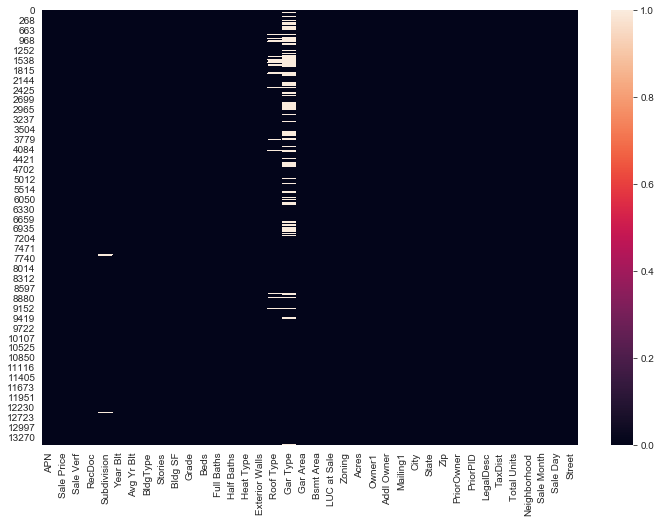

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned.isnull())

Here we can see we are very close to cleaning our data entirely for our analysis. We will export this cleaner version of our data to a csv.

In [20]:
cleaned.to_csv('Cleaned_WashoeSalesReport2017.csv',index=False)

Before we go on and choose a subset of the data for our analysis, we should notice a interesting feature of our data.

By looking at the different bins of the sales price on residential houses we can see how the data blows up at certain higher million dollar sales prices.

In [21]:
# Notice weird trend in data
total_residential = cleaned[(cleaned['BldgType'] == 'Residential House')]

house_less_than = [cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 1e6)],
                   cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 5e6)],
                   cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 10e6)],
                   cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 15e6)],
                   cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 18e6)],
                   cleaned[(cleaned['BldgType'] == 'Residential House') 
                           & (cleaned['Sale Price'] < 19e6)]]

In [22]:
list_res = [1,5,10,15,18,19]

for price,data in zip(list_res,house_less_than):
    print('Houses less than {} million: {}'.format(price,len(data)))

Houses less than 1 million: 8455
Houses less than 5 million: 8779
Houses less than 10 million: 8854
Houses less than 15 million: 8855
Houses less than 18 million: 8856
Houses less than 19 million: 8934


Notice we get a reasonable change from 1-5 million. We get a total of 77 houses sold from 5-18 million and a total of 3 sold from 10-18 million. Very oddly, we now notice an increase of 78 houses between 18-19 million! This was odd to see and I do not know what caused this in the data. If I had to make a guess I would say it has something to do with housing developers buying large quantities of houses at once, but I cannot be exactly sure and it is fairly unimportant to this particular analysis since we will be dealing with houses under a million dollars.

Though it will not affect our analysis, it is a very interesting trend to see in something like the Washoe County Sales Report since this represents some type of real event!

## **Choosing a subset of our data**

Now that we have cleaned our data up so that it can be useful, we may now take the subset we are interested in.

In [23]:
house_more_mil = cleaned[(cleaned['BldgType'] == 'Residential House') 
                         & (cleaned['Sale Price'] >= 1e6)].copy()

percent = len(house_more_mil)/len(total_residential)

print('Percentage of residential houses over 1 million dollars: {:.2f}%'.format(percent*100))

Percentage of residential houses over 1 million dollars: 6.97%


We can see that we have are essentially going to leave out about 7% of our cleaned data.

Here we grab the residential houses below or equal to a million dollars.

In [24]:
residential_house = cleaned[(cleaned['BldgType'] == 'Residential House') 
                            & (cleaned['Sale Price'] < 1e6)].copy()

In [25]:
residential_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 3 to 13498
Data columns (total 38 columns):
APN               8455 non-null object
Sale Price        8455 non-null int64
Sale Verf         8455 non-null object
RecDoc            8455 non-null object
Subdivision       8453 non-null object
Year Blt          8455 non-null int64
Avg Yr Blt        8455 non-null int64
BldgType          8455 non-null object
Stories           8455 non-null object
Bldg SF           8455 non-null int64
Grade             8455 non-null object
Beds              8455 non-null int64
Full Baths        8455 non-null int64
Half Baths        8455 non-null int64
Heat Type         8455 non-null object
Exterior Walls    8455 non-null object
Roof Type         8455 non-null object
Gar Type          7683 non-null object
Gar Area          8455 non-null int64
Bsmt Area         8455 non-null int64
LUC at Sale       8455 non-null object
Zoning            8455 non-null object
Acres             8455 non-null float64
Own

In [26]:
residential_house.describe()

,Sale Price,Year Blt,Avg Yr Blt,Bldg SF,Beds,Full Baths,Half Baths,Gar Area,Bsmt Area,Acres,TaxDist,Total Units,Sale Month,Sale Day
count,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000
mean,378426.384151,1992.991603,1993.550680,1955.400118,3.319219,2.186399,0.315789,507.231224,78.938261,0.604477,1996.414193,1.012774,6.780958,17.951745
std,151453.905090,21.442046,20.641109,697.617535,0.768543,0.607523,0.471928,237.095159,318.698342,3.934952,1303.102779,0.172863,3.177174,8.863755
min,27019.000000,1900.000000,1900.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000987,1000.000000,1.000000,1.000000,1.000000
25%,275175.000000,1980.000000,1981.000000,1430.500000,3.000000,2.000000,0.000000,420.000000,0.000000,0.142998,1000.000000,1.000000,4.000000,11.000000
50%,345000.000000,1999.000000,1999.000000,1848.000000,3.000000,2.000000,0.000000,483.000000,0.000000,0.179683,1011.000000,1.000000,7.000000,18.000000
75%,435000.000000,2007.000000,2007.000000,2371.000000,4.000000,2.000000,1.000000,640.000000,0.000000,0.298186,2000.000000,1.000000,9.000000,26.000000
max,999800.000000,2018.000000,2018.000000,6524.000000,7.000000,6.000000,3.000000,2576.000000,3412.000000,122.767998,9601.000000,10.000000,12.000000,31.000000


## **EDA**

Now we may start to analyze the data on residential homes in Washoe County. Let's see what the minimum and maximum price of a residential house sold in Washoe County was in 2017.

In [27]:
house_price_min,house_price_max = (residential_house['Sale Price'].min(),
                                   residential_house['Sale Price'].max())

print('Min: {} , Max: {} '.format(house_price_min,house_price_max))

Min: 27019 , Max: 999800 


Wow, $27,019! Very interesting, let's look at that entry.

In [28]:
residential_house[residential_house['Sale Price'] 
                  == residential_house['Sale Price'].min()]

,APN,Sale Price,Sale Verf,RecDoc,Subdivision,Year Blt,Avg Yr Blt,BldgType,Stories,Bldg SF,...,Zip,PriorOwner,PriorPID,LegalDesc,TaxDist,Total Units,Neighborhood,Sale Month,Sale Day,Street
1085,008-183-10,27019,2D,4702211,MORRILL`S ADDITION,1910,1910,Residential House,SINGLE STORY,700,...,89509,"FORTUNE, DANIEL J",- -,MORRILLS ADD W2 LOT 15 BLK 7,1002,1,AHFC,5,8,1/2 EUREKA AVE


Seems like a reasonable entry, but is no doubt an odd/interesting one.

## **Visualizations**

We now want to answer some questions about our data by using some visualizations.

We are interested in answering questions such as,
* How much does a house cost in Washoe County?
* What months are most popular for houses to be sold in?
* Where are homebuyers moving in from?
* How much square footage in a house can a person expect in Washoe County?

In [29]:
bins = [0,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,10e5]

norm_sales = pd.cut(residential_house['Sale Price'],
                    bins).value_counts(sort=False,
                                       normalize=True)

Text(0.5, 0, 'Price Intervals')

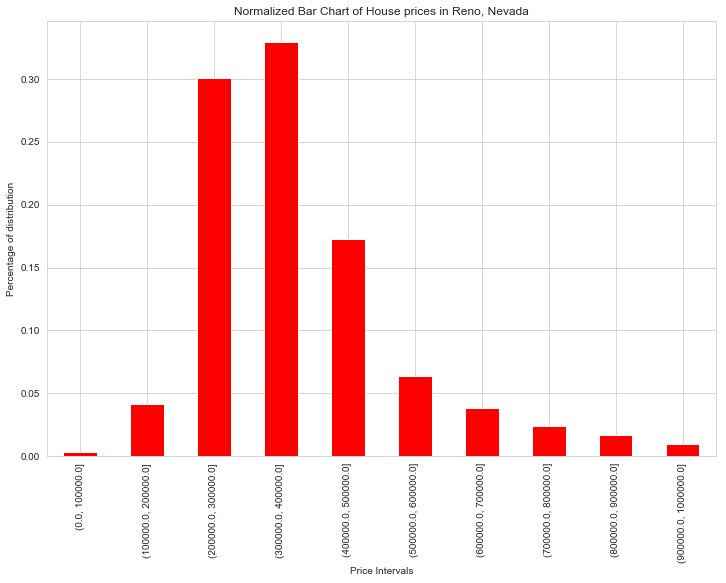

In [30]:
norm_sales.plot.bar(rot = 90,color="r", figsize=(12,8))
plt.title('Normalized Bar Chart of House prices in Reno, Nevada')
plt.ylabel('Percentage of distribution')
plt.xlabel('Price Intervals')


We can see that more than 70% of houses are sold between $200-500k in Washoe County!

Let's now look at the most popular month houses are sold in!

In [31]:
sales_by_month = residential_house['Sale Month'].value_counts(sort=True)

In [32]:
sales_by_month = sales_by_month.sort_index()

sales_by_month = sales_by_month.rename({
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December',})

Text(0.5, 0, 'Months')

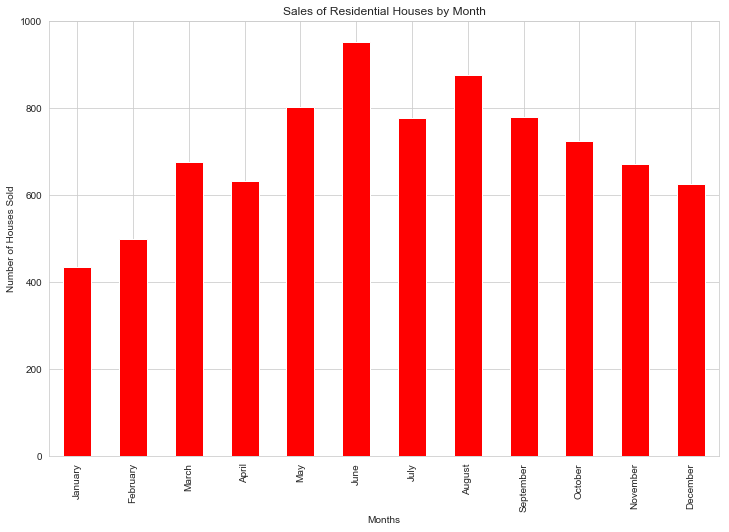

In [33]:
sales_by_month.plot.bar(color='r',figsize=(12,8))
plt.title('Sales of Residential Houses by Month')
plt.ylabel('Number of Houses Sold')
plt.xlabel('Months')

Here we can see that the distribution looks relatively normal, but with a slight right skew. From this we can confidently say that houses are sold less in the first 4 months of the year than the last 8 months, with the summer months between June-August being the most popular and a steady decline of houses sold from August-December.

We also can make a heatmap of the months to get help us get a better understanding of the months in comparison with each other.

Text(88.0, 0.5, 'Months')

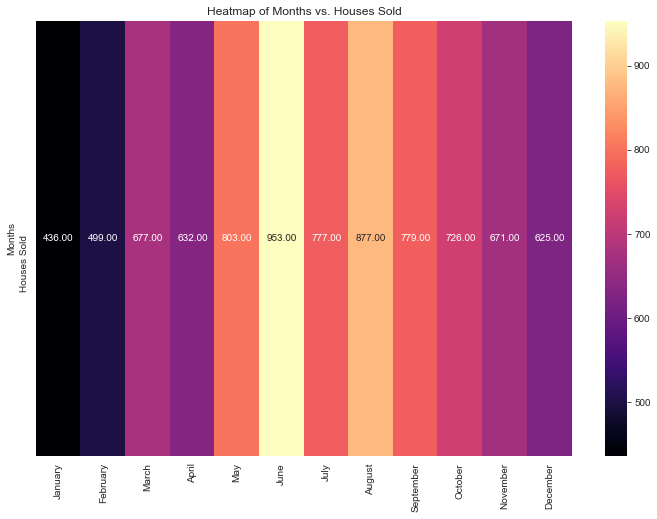

In [34]:
plt.figure(figsize=(12,8))

sns.heatmap(sales_by_month.to_frame('Houses Sold').transpose(),
            annot=True,cmap='magma',fmt='.2f')

plt.title('Heatmap of Months vs. Houses Sold')
plt.ylabel('Months')

We may also want to know what type of home buyers we are dealing with, so let's see where our home buyers are from!

Text(0, 0.5, 'States')

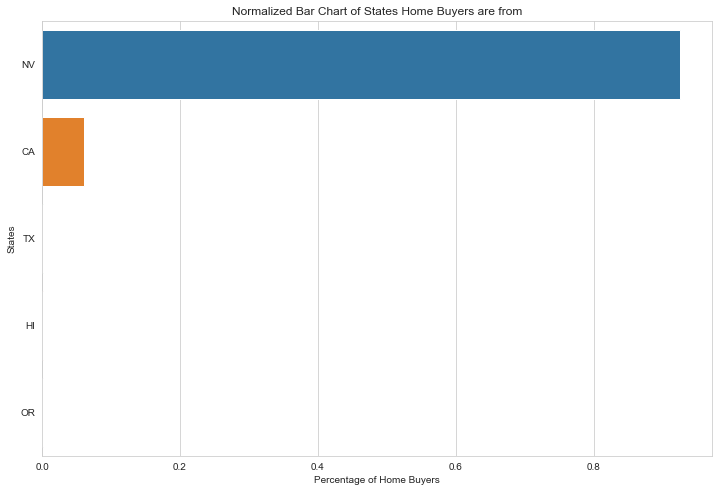

In [35]:
fig,axes = plt.subplots(figsize=(12,8))

sns.barplot(x=residential_house['State'].value_counts(normalize=True).head(5).values,
            y=residential_house['State'].value_counts(normalize=True).index[:5])

plt.title('Normalized Bar Chart of States Home Buyers are from')
plt.xlabel('Percentage of Home Buyers')
plt.ylabel('States')

Surprisingly, it looks like more than 90% are from Nevada while less than 10% are from CA.

Lastly, let's look at what the general square footage of a house in Washoe County looks like just to help us visualize some more of our data.

Text(0.5, 0, 'House Square Footage')

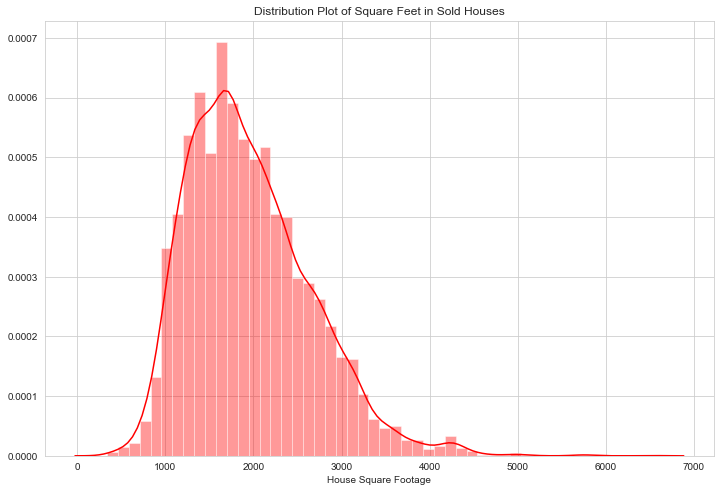

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(residential_house['Bldg SF'],color='r')
plt.title('Distribution Plot of Square Feet in Sold Houses')
plt.xlabel('House Square Footage')

This is informative, but since the 'Year Blt' column is also available maybe we can extract some more useful information.

We should start by binning our values and then we can use the groupby method to see some of the different values based on binned years.

By binning the year built column we can now continue to answer more questions such as,
* Does buying a more recently built home have an affect on the size of the house?
* Do more recently built homes tend to cost more than older homes and by how much?

In [37]:
bins = [1900,1920,1940,1960,1970,1980,1990,2000,2010,2017]
residential_house['Year bins'] = pd.cut(residential_house['Year Blt'],bins)
residential_house['Year bins'].value_counts(sort=False)

(1900, 1920]      39
(1920, 1940]     172
(1940, 1960]     608
(1960, 1970]     538
(1970, 1980]     804
(1980, 1990]     745
(1990, 2000]    1588
(2000, 2010]    2114
(2010, 2017]    1779
Name: Year bins, dtype: int64

Text(0.5, 1.0, 'Average Square Footage in Houses Sold in 2017 given by Binned Years')

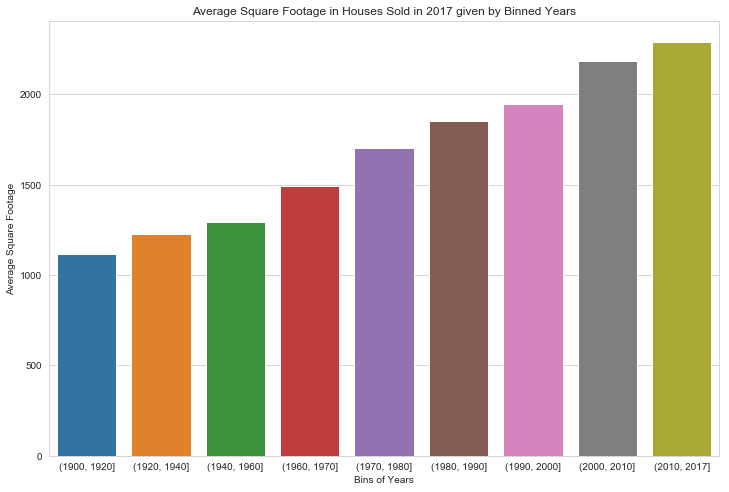

In [38]:
average_sq_ft = residential_house[['Bldg SF','Year bins']].groupby('Year bins').mean()

fig,axes = plt.subplots(1,1,figsize=(12,8))

sns.barplot(x=average_sq_ft.index.astype('str'),
            y=average_sq_ft.values.reshape(len(average_sq_ft)),
            ax=axes)

plt.xlabel('Bins of Years')
plt.ylabel('Average Square Footage')
plt.title('Average Square Footage in Houses Sold in 2017 given by Binned Years')

As we can see here, this graph shows an increase in square footage as the years progress and also gives a good representation of the amount of space you could expect in a house built during a certain time.

Let's do the same for the Sales Price.

Text(0.5, 1.0, 'Average Sales Price of Houses Sold in 2017 given by Binned Years')

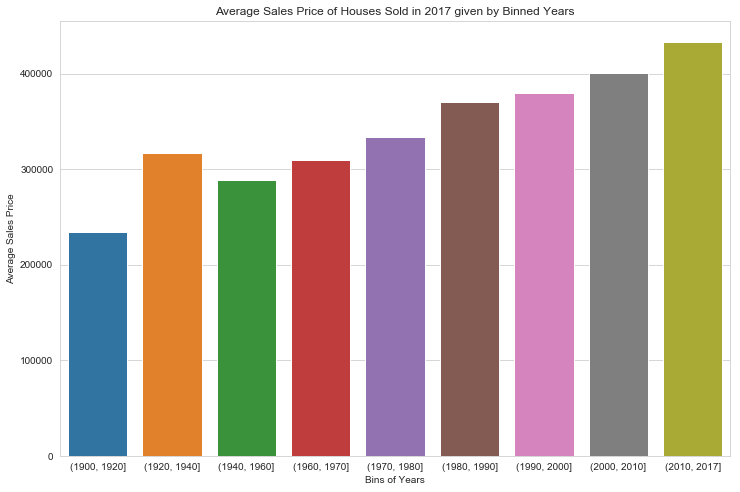

In [39]:
average_sq_ft = residential_house[['Sale Price','Year bins']].groupby('Year bins').mean()

fig,axes = plt.subplots(1,1,figsize=(12,8))

sns.barplot(x=average_sq_ft.index.astype('str'),
            y=average_sq_ft.values.reshape(len(average_sq_ft)),
            ax=axes)

plt.xlabel('Bins of Years')
plt.ylabel('Average Sales Price')
plt.title('Average Sales Price of Houses Sold in 2017 given by Binned Years')

Here we also see that you could generally expect to pay more for a house built more recently and less for an older home. Interestingly enough, we see a rise in home prices from 1920-1940, what this is accounted to is unknown to me. We could possibly account this to Washoe County being rather historical and the time between 1920-1940 being a special time in history, thus causing homes from that time period to cost more.

## **Preparing data for prediction**

Now that we have visualized our data let's go ahead and try to make predictions for our data on the Sales Price.

We must first make sure our data is all in numeric form so that the models can be fit properly.

We will start by looking at two of our columns 'Stories' and 'Grade'. We want to group similar values together so that the model can predict better and not have data values with only a few entries.

In [40]:
residential_house['Grade'].value_counts()

Average                                         2581
Fair-Average                                    1740
Average-Good                                    1699
Fair                                            1286
Good                                             455
Very Good                                        205
Good-Very Good                                   170
Low-Fair                                         146
Very Good-Excellent                               65
Low                                               50
Excellent                                         43
7.0 HIGH VALUE CLASS I                            10
8.5 HIGH VALUE CLASS II/HIGH VALUE CLASS III       3
9.0 HIGH VALUE CLASS III                           2
Name: Grade, dtype: int64

In [41]:
residential_house['Grade'].replace({'7.0 HIGH VALUE CLASS I':'Average',
                                    '8.5 HIGH VALUE CLASS II/HIGH VALUE CLASS III':'Good-Very Good',
                                    '9.0 HIGH VALUE CLASS III':'Very Good'},inplace=True)

In [42]:
residential_house['Grade'].value_counts()

Average                2591
Fair-Average           1740
Average-Good           1699
Fair                   1286
Good                    455
Very Good               207
Good-Very Good          173
Low-Fair                146
Very Good-Excellent      65
Low                      50
Excellent                43
Name: Grade, dtype: int64

Here we have simply replaced the 3 values with better corresponding groups.

Now we will perform the same for the 'Stories' column.

In [43]:
residential_house['Stories'].value_counts()

SINGLE STORY    5767
TWO STORY       2238
1.5 STRY FN      218
SPLIT LEVEL      200
THREE STORY       14
BI_LEVEL           9
2.5 STRY FN        6
1.5 STRY UNF       3
Name: Stories, dtype: int64

In [44]:
residential_house['Stories'].replace({'1.5 STRY FN':'SINGLE HALF STORY',
                                     '2.5 STRY FN':'TWO HALF STORY',
                                     '1.5 STRY UNF':'SINGLE HALF STORY',
                                     'BI_LEVEL':'SPLIT LEVEL'},inplace=True)

In [45]:
residential_house['Stories'].value_counts()

SINGLE STORY         5767
TWO STORY            2238
SINGLE HALF STORY     221
SPLIT LEVEL           209
THREE STORY            14
TWO HALF STORY          6
Name: Stories, dtype: int64

And very similarly, we now have better grouped columns for our predictor values.

Now let's look at our data once more to see what columns we do not need for our predictions.

In [46]:
residential_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 3 to 13498
Data columns (total 39 columns):
APN               8455 non-null object
Sale Price        8455 non-null int64
Sale Verf         8455 non-null object
RecDoc            8455 non-null object
Subdivision       8453 non-null object
Year Blt          8455 non-null int64
Avg Yr Blt        8455 non-null int64
BldgType          8455 non-null object
Stories           8455 non-null object
Bldg SF           8455 non-null int64
Grade             8455 non-null object
Beds              8455 non-null int64
Full Baths        8455 non-null int64
Half Baths        8455 non-null int64
Heat Type         8455 non-null object
Exterior Walls    8455 non-null object
Roof Type         8455 non-null object
Gar Type          7683 non-null object
Gar Area          8455 non-null int64
Bsmt Area         8455 non-null int64
LUC at Sale       8455 non-null object
Zoning            8455 non-null object
Acres             8455 non-null float64
Own

We will drop a lot of these columns for predictions since they would not be very helpful to predict a Sales Price.

In [47]:
drop = [
    'APN',
    'Sale Verf',
    'RecDoc',
    'Subdivision',
    'Avg Yr Blt',
    'Total Units',
    'TaxDist',
    'LegalDesc',
    'PriorPID',
    'PriorOwner',
    'Zip',
    'State',
    'City',
    'Mailing1',
    'Addl Owner',
    'Owner1',
    'Zoning',
    'LUC at Sale',
    'BldgType',
    'Year bins'
]

residential_house.drop(drop,axis=1,inplace=True)

Here we have dropped our columns and are ready to proceed to making our predictions!

## **Making Predictions**

Let's first import our library functions from sklearn.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

Let's look at what our current predictors looks like.

In [49]:
residential_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 3 to 13498
Data columns (total 19 columns):
Sale Price        8455 non-null int64
Year Blt          8455 non-null int64
Stories           8455 non-null object
Bldg SF           8455 non-null int64
Grade             8455 non-null object
Beds              8455 non-null int64
Full Baths        8455 non-null int64
Half Baths        8455 non-null int64
Heat Type         8455 non-null object
Exterior Walls    8455 non-null object
Roof Type         8455 non-null object
Gar Type          7683 non-null object
Gar Area          8455 non-null int64
Bsmt Area         8455 non-null int64
Acres             8455 non-null float64
Neighborhood      8455 non-null object
Sale Month        8455 non-null int64
Sale Day          8455 non-null int64
Street            8455 non-null object
dtypes: float64(1), int64(10), object(8)
memory usage: 1.3+ MB


We will define three of our methods here,
* LabelEncoder() - to encode values numerically
* StandardScaler() - to standardize the data for RFE
* LinearRegression() - to predict our Sales Price

In [50]:
le = LabelEncoder()
sc = StandardScaler()
lm = LinearRegression()

Let's use our Label encoder to encode the 'Grade' and 'Stories' columns we cleaned up earlier.

In [51]:
residential_house['Grade'] = le.fit_transform(residential_house['Grade'])
residential_house['Stories'] = le.fit_transform(residential_house['Stories'])

Now that we have encoded the string columns we wanted, let's get rid of the rest of the categorical data.

In [52]:
categorical = [columns 
               for columns 
               in residential_house.dtypes.index 
               if residential_house.dtypes[columns] == 'object']

residential_house.drop(categorical,axis=1,inplace=True)

Now we must define our X and Y, Y will be assigned to the 'Sale Price' column and X will be the rest of the columns we prepared.

We will also save the name of the columns and then standardize our data for RFE.

RFE stands for Recursive Feature Elimination, using this we may assign weights to our features and learn which is the most important towards our prediction.

In [53]:
y = residential_house['Sale Price']
X = residential_house.drop(['Sale Price'],axis=1)

old_columns = X.columns
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns=old_columns)

# We tell RFE to use LinearRegression as the model, rank 4 features the best, and only dispose of 1 
# feature at a time each iteration
selector = RFE(lm,4,1)
selector = selector.fit(X,y)

C:\Users\Justin\Anaconda3\envs\notebook2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Justin\Anaconda3\envs\notebook2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Here we may now look at the rankings in order of column position.

In [54]:
selector.ranking_

array([8, 1, 1, 6, 1, 2, 3, 5, 1, 7, 4, 9])

We only are interested in the 4 best columns, so we can drop all the rest using list comprehension and the drop function.

In [55]:
columns_not_one = [i 
                   for (i,x) 
                   in enumerate(selector.ranking_) 
                   if (x != 1)]

print(columns_not_one)

X.drop(X.columns[columns_not_one],axis=1,inplace=True)

[0, 3, 5, 6, 7, 9, 10, 11]


In [56]:
X.columns

Index(['Stories', 'Bldg SF', 'Beds', 'Bsmt Area'], dtype='object')

We may now see what columns are left as predictors for Sales Price.
* Stories
* Building Square Footage
* Beds
* Basement Area

These are the predictors that returned the highest R squared score and thus we will use them as our predictors.

Let's just look at the data and make sure everything is okay.

In [57]:
X.shape

(8455, 4)

In [58]:
X.head()

,Stories,Bldg SF,Beds,Bsmt Area
0,-0.596982,-0.890799,-0.415381,-0.247704
1,1.649839,-0.360391,-0.415381,-0.247704
2,1.649839,-0.555352,-0.415381,-0.247704
3,-0.596982,-0.588323,-0.415381,-0.247704
4,-0.596982,-0.588323,-0.415381,-0.247704


Now we must split our data into two sets: a train set and a test set.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

We can now fit our model using the training set and training y values.

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that our model is trained we can use the test set as 'new data' and test the accuracy of our predictions.

In [61]:
predictions = lm.predict(X_test)

Using and R_squared score we may look at the accuracy between our predicted values and the actual values.

In [62]:
print(r2_score(y_test,predictions))

0.5829786708333465


We see that our predictions are at 58%, this is not bad, but not great either. We could improve this by adding more features, possibly incoporating market trends for housing, etc.

Lastly, let's plot our residuals to make sure it is normal and centered around 0.

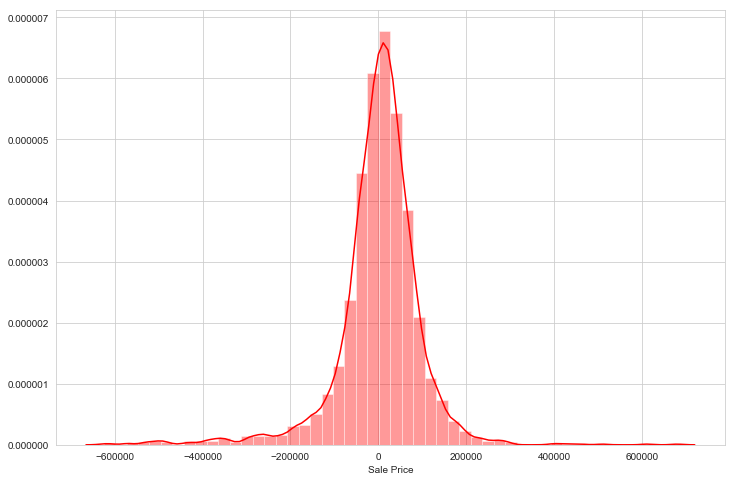

In [63]:
plt.figure(figsize=(12,8))
sns.distplot(predictions-y_test,color='r')

Great! We have residuals that look normal and seem to be very close to a mean of 0 indicating a good linear model fit. 